#Origem dos dados: 
[Clientes de cartão de crédito](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers?datasetId=982921&sortBy=voteCount)

##1. Problema de Negocios 
O objetivo deste problema é entender melhor quais atributos (recursos) estão fazendo nossos clientes deixarem a organização. Além disso, neste problema  temos três tarefas principais que realizaremos a fim de chegar a soluções e conclusões potenciais:

Explorar nossos dados: isso nos ajudará a obter algumas insights para ter uma idéia geral do que poderiam ser os recursos potenciais que estão fazendo com que os clientes deixem a organização.
Importância do Recurso: Quais recursos têm o maior impacto para nossos clientes deixarem a organização?
Implementação de Machine learning: isso ficarar para estudos futuros

##2. Introdução

Muitas organizações eventualmente enfrentarão uma situação em que um cliente decide deixar a organização. No entanto, questões surgem especialmente quando se trata das razões pelas quais o cliente decidiu deixar a empresa. Definitivamente há razões que não são consistentes com outros clientes que deixaram uma organização, mas e se houver um padrão quanto à razão pela qual os clientes decidiram deixar a organização? Se a empresa pudesse detectar as principais razões pelas quais os clientes estão deixando a empresa, a empresa seria capaz de reagir e evitar que os clientes deixem?! Além disso, se a empresa for capaz de entender do passado, a organização será capaz de prevenir futuras perdas de clientes no futuro.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
analise_cred = pd.read_csv("BankChurners.csv")

## 3. Análise de Consistência dos Dados

In [ ]:
analise_cred.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

## Detalhes e descrições das colunas 

- __Sinal de Atrito:__ Esta é nossa variável alvo, significa se nosso cliente decidiu deixar a organização ou se há uma alta probabilidade de que o cliente sairá.

- __Categoria de renda:__ A qual categoria de renda o cliente pertence. Renda Anual do titular da conta

- __Meses no livro:__ Período de relacionamento com o banco

- __Contagem total de produtos:__ Nº total de produtos detidos pelo cliente

- __Meses Inativos:__ Quantidade de inatividade ao usar o cartão de crédito.

- __Limite de Crédito:__ Limite de crédito que o cliente atualmente tem.

- __Saldo Total de Revisão:__ A parte não paga que se transfere para o próximo mês quando um cliente não paga.

- __Razão Média de Utilização:__ Mede quanto de crédito você está usando em comparação com quanto você tem disponível.

- __Aberto para comprar:__ A quantidade de crédito disponível em um determinado momento na conta de um titular de cartão de crédito. Assim, a média aberta para comprar é o crédito disponível médio alocado a um cliente específico.



### Todas colunas com uma breve descrição

CLIENTNUM: Número do cliente. Identificador único do cliente que possui a conta

Customer_Age: Variável demográfica - Idade do cliente em anos

Gender: Variável demográfica - M = Masculino, F = Feminino

Dependent_count: Variável demográfica - Número de dependentes

Education_Level: Variável demográfica - Qualificação educacional do titular da conta (exemplo: ensino médio, graduação, etc.)

Marital_Status: Variável demográfica - Casado, Solteiro, Divorciado, Desconhecido

Income_Category: Variável demográfica - Categoria de renda anual do titular da conta (<40K, 40K - 60K, 60K-80K, 80K-120K,> $ 120K, Desconhecido)

Card_Category: Variável de produto - Tipo de cartão (Azul, Prata, Ouro, Platina)

Months_on_book: Período de relacionamento com o banco

Total_Relationship_Count: Número total de produtos mantidos pelo cliente

Months_Inactive_12_mon: Número de meses inativos nos últimos 12 meses

Contacts_Count_12_mon: Número de contatos nos últimos 12 meses

Credit_Limit: Limite de crédito no cartão de crédito

Total_Revolving_Bal: Saldo rotativo total no cartão de crédito

Avg_Open_To_Buy: Linha de crédito aberta para compra (média dos últimos 12 meses)

Total_Amt_Chng_Q4_Q1: Mudança no valor da transação (Q4 sobre Q1)

Total_Trans_Amt: Valor total da transação (últimos 12 meses)

Total_Trans_Ct: Total de transações realizadas (últimos 12 meses)

Total_Ct_Chng_Q4_Q1: Mudança no número de transações (Q4 sobre Q1)

Avg_Utilization_Ratio: Razão média de utilização do cartão

In [ ]:
analise_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [3]:
#Como as duas ultimas colunas não nos acrescentam nenhuma informação relevante, iremos dropalas
analise_cred.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
                   "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"],
                   axis=1,
                   inplace=True)


In [ ]:
# Constatando que não temos valores nulos, mesmo já tendo verificado com o info
analise_cred.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
# Conferindo valores duplicados
analise_cred[analise_cred.duplicated()]

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]

In [ ]:
# Como alguns valores são muito grandes numericamente, o pandas ira exibilos
# em notação cientifica, por esse motivo converto o fomato para float abaixo.
pd.options.display.float_format = '{:.2f}'.format
analise_cred.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count     10127.00      10127.00         10127.00        10127.00   
mean  739177606.33         46.33             2.35           35.93   
std    36903783.45          8.02             1.30            7.99   
min   708082083.00         26.00             0.00           13.00   
25%   713036770.50         41.00             1.00           31.00   
50%   717926358.00         46.00             2.00           36.00   
75%   773143533.00         52.00             3.00           40.00   
max   828343083.00         73.00             5.00           56.00   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count                  10127.00                10127.00   
mean                       3.81                    2.34   
std                        1.55                    1.01   
min                        1.00                    0.00   
25%                        3.00                    2.00   
50%                        4.00                    2.00   
75%                        5.00                    3.00   
max                        6.00                    6.00   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count               10127.00      10127.00             10127.00   
mean                    2.46       8631.95              1162.81   
std                     1.11       9088.78               814.99   
min                     0.00       1438.30                 0.00   
25%                     2.00       2555.00               359.00   
50%                     2.00       4549.00              1276.00   
75%                     3.00      11067.50              1784.00   
max                     6.00      34516.00              2517.00   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count         10127.00              10127.00         10127.00        10127.00   
mean           7469.14                  0.76          4404.09           64.86   
std            9090.69                  0.22          3397.13           23.47   
min               3.00                  0.00           510.00           10.00   
25%            1324.50                  0.63          2155.50           45.00   
50%            3474.00                  0.74          3899.00           67.00   
75%            9859.00                  0.86          4741.00           81.00   
max           34516.00                  3.40         18484.00          139.00   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count             10127.00               10127.00  
mean                  0.71                   0.27  
std                   0.24                   0.28  
min                   0.00                   0.00  
25%                   0.58                   0.02  
50%                   0.70                   0.18  
75%                   0.82                   0.50  
max                   3.71                   1.00

In [ ]:
# Inspecionando os atributos constantes
for col in analise_cred:
    print(f"{col} | valores unicos: {analise_cred[col].nunique()}")

CLIENTNUM | valores unicos: 10127
Attrition_Flag | valores unicos: 2
Customer_Age | valores unicos: 45
Gender | valores unicos: 2
Dependent_count | valores unicos: 6
Education_Level | valores unicos: 7
Marital_Status | valores unicos: 4
Income_Category | valores unicos: 6
Card_Category | valores unicos: 4
Months_on_book | valores unicos: 44
Total_Relationship_Count | valores unicos: 6
Months_Inactive_12_mon | valores unicos: 7
Contacts_Count_12_mon | valores unicos: 7
Credit_Limit | valores unicos: 6205
Total_Revolving_Bal | valores unicos: 1974
Avg_Open_To_Buy | valores unicos: 6813
Total_Amt_Chng_Q4_Q1 | valores unicos: 1158
Total_Trans_Amt | valores unicos: 5033
Total_Trans_Ct | valores unicos: 126
Total_Ct_Chng_Q4_Q1 | valores unicos: 830
Avg_Utilization_Ratio | valores unicos: 964


In [ ]:
# Inspecionando quais são os atributos 
for col in analise_cred:
    if analise_cred[col].nunique() <= 10:
      print(f"{col} | valores unicos: {analise_cred[col].unique()}")

Attrition_Flag | valores unicos: ['Existing Customer' 'Attrited Customer']
Gender | valores unicos: ['M' 'F']
Dependent_count | valores unicos: [3 5 4 2 0 1]
Education_Level | valores unicos: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status | valores unicos: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category | valores unicos: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category | valores unicos: ['Blue' 'Gold' 'Silver' 'Platinum']
Total_Relationship_Count | valores unicos: [5 6 4 3 2 1]
Months_Inactive_12_mon | valores unicos: [1 4 2 3 6 0 5]
Contacts_Count_12_mon | valores unicos: [3 2 0 1 4 5 6]


A baixo temos outro metodo para conferir os valores unicos contidos nas colunas

In [ ]:
# Visão geral dos atributos categóricos únicos
analise_cred_categorias = analise_cred.iloc[:,1:13]

for atributo in analise_cred_categorias:
  print(f"{atributo} : {analise_cred_categorias[atributo].unique()}")

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Customer_Age : [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender : ['M' 'F']
Dependent_count : [3 5 4 2 0 1]
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book : [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count : [5 6 4 3 2 1]
Months_Inactive_12_mon : [1 4 2 3 6 0 5]
Contacts_Count_12_mon : [3 2 0 1 4 5 6]


###Conferindo os valores em porcentagem.
Para os casos com "unknown" pensei na possibilidade
de redistribuilos entre os outros valores das colunas, mas 
depois vi que não teria necessidade 

In [ ]:
analise_cred['Marital_Status'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

In [ ]:
analise_cred['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
analise_cred['Attrition_Flag'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

In [ ]:
# Uma breve conferida se o estado civil desconhecido e problemas o banco
analise_cred[analise_cred['Marital_Status'] == 'Unknown']['Attrition_Flag'].value_counts()

Existing Customer    620
Attrited Customer    129
Name: Attrition_Flag, dtype: int64

In [ ]:
analise_cred['Income_Category'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

In [ ]:
analise_cred['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
analise_cred['Education_Level'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

In [ ]:
analise_cred['Card_Category'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

In [4]:
# Mudando a marcação para binarizado e aplicar a correlação

# Attrited Customer 1 | Existing Customer 0
analise_cred_exp = analise_cred.replace({'Attrition_Flag':{'Existing Customer':0, 
                                                            'Attrited Customer':1,
                                                          }})

# Masculino = 1 | Feminino = 0
analise_cred_exp = analise_cred_exp.replace({'Gender':{'F':0, 
                                                       'M':1
                                                      }})

Aqui pensei em atribuir intervalos inteiros de forma alternativa aos Dummies, pois teriamos muitas colunas criadas, totalizando 37 colunas

In [5]:
analise_cred_exp = analise_cred_exp.replace({'Education_Level':{'Unknown':0, 
                                                            'Uneducated':1, 
                                                            'High School':2,
                                                            'College':3,
                                                            'Graduate':4,
                                                            'Post-Graduate':5,
                                                            'Doctorate':6
                                                            }})

In [6]:
analise_cred_exp = analise_cred_exp.replace({'Income_Category':{'Unknown':0, 
                                                                'Less than $40K':1, 
                                                                '$40K - $60K':2,
                                                                '$60K - $80K':3,
                                                                '$80K - $120K':4,
                                                                '$120K +':5
                                                                }})

In [7]:
analise_cred_exp = analise_cred_exp.replace({'Income_Category':{'Unknown':0, 
                                                                'Less than $40K':1, 
                                                                '$40K - $60K':2,
                                                                '$60K - $80K':3,
                                                                '$80K - $120K':4,
                                                                '$120K +':5
                                                                }})

In [8]:
analise_cred_exp = analise_cred_exp.replace({'Marital_Status':{'Unknown':0, 
                                                               'Single':1, 
                                                               'Married':2,
                                                               'Divorced':3
                                                               }})

In [9]:
analise_cred_exp = analise_cred_exp.replace({'Card_Category':{'Blue':0, 
                                                              'Silver':1, 
                                                              'Gold':2,
                                                              'Platinum':3
                                                              }})

In [ ]:
analise_cred_exp

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               0            45       1                3   
1      818770008               0            49       0                5   
2      713982108               0            51       1                3   
3      769911858               0            40       0                4   
4      709106358               0            40       1                3   
...          ...             ...           ...     ...              ...   
10122  772366833               0            50       1                2   
10123  710638233               1            41       1                2   
10124  716506083               1            44       0                1   
10125  717406983               1            30       1                2   
10126  714337233               1            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0                    2               2                3              0   
1                    4               1                1              0   
2                    4               2                4              0   
3                    2               0                1              0   
4                    1               2                3              0   
...                ...             ...              ...            ...   
10122                4               1                2              0   
10123                0               3                2              0   
10124                2               2                1              0   
10125                4               0                2              0   
10126                4               2                1              1   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  39  ...                       1                      3   
1                  44  ...                       1                      2   
2                  36  ...                       1                      0   
3                  34  ...                       4                      1   
4                  21  ...                       1                      0   
...               ...  ...                     ...                    ...   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0           12691.0                  777          11914.0   
1            8256.0                  864           7392.0   
2            3418.0                    0           3418.0   
3            3313.0                 2517            796.0   
4            4716.0                    0           4716.0   
...             ...                  ...              ...   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                     1.335             1144              42   
1                     1.541             1291              33   
2                     2.594             1887              20   
3                     1.405             1171              20   
4                     2.175              816              28   
...                     ...              ...             ...   
10122                 0.703            15476             117   
10123                 0.804             8764   

##4º Análise Exploratória dos Dados

In [10]:
# Após atribuir valores inteiroas as colunas objeto, aplicamos a função de correlaçao para iniciar as analises
analise_cred_corr = analise_cred_exp.corr()

In [11]:
analise_cred_corr

CLIENTNUM  Attrition_Flag  Customer_Age    Gender  \
CLIENTNUM                  1.000000       -0.046430      0.007613  0.020188   
Attrition_Flag            -0.046430        1.000000      0.018203 -0.037272   
Customer_Age               0.007613        0.018203      1.000000 -0.017312   
Gender                     0.020188       -0.037272     -0.017312  1.000000   
Dependent_count            0.006772        0.018991     -0.122254  0.004563   
Education_Level           -0.006946        0.008796     -0.002369 -0.005087   
Marital_Status             0.003284       -0.018597      0.011265  0.000007   
Income_Category            0.026295       -0.013577      0.023508  0.786608   
Card_Category              0.002086        0.002354     -0.018235  0.080093   
Months_on_book             0.134588        0.013687      0.788912 -0.006728   
Total_Relationship_Count   0.006907       -0.150005     -0.010931  0.003157   
Months_Inactive_12_mon     0.005729        0.152449      0.054361 -0.011163   
Contacts_Count_12_mon      0.005694        0.204491     -0.018452  0.039987   
Credit_Limit               0.005708       -0.023873      0.002476  0.420806   
Total_Revolving_Bal        0.000825       -0.263053      0.014780  0.029658   
Avg_Open_To_Buy            0.005633       -0.000285      0.001151  0.418059   
Total_Amt_Chng_Q4_Q1       0.017369       -0.131063     -0.062042  0.026712   
Total_Trans_Amt           -0.019692       -0.168598     -0.046446  0.024890   
Total_Trans_Ct            -0.002961       -0.371403     -0.067097 -0.067454   
Total_Ct_Chng_Q4_Q1        0.007696       -0.290054     -0.012143 -0.005800   
Avg_Utilization_Ratio      0.000266       -0.178410      0.007114 -0.257851   

                          Dependent_count  Education_Level  Marital_Status  \
CLIENTNUM                        0.006772        -0.006946        0.003284   
Attrition_Flag                   0.018991         0.008796       -0.018597   
Customer_Age                    -0.122254        -0.002369        0.011265   
Gender                           0.004563        -0.005087        0.000007   
Dependent_count                  1.000000         0.000472       -0.000337   
Education_Level                  0.000472         1.000000        0.014875   
Marital_Status                  -0.000337         0.014875        1.000000   
Income_Category                  0.066278        -0.011677        0.006557   
Card_Category                    0.030469         0.014989       -0.043905   
Months_on_book                  -0.103062         0.006613        0.012084   
Total_Relationship_Count        -0.039076         0.000766        0.021393   
Months_Inactive_12_mon          -0.010768         0.005761       -0.001709   
Contacts_Count_12_mon           -0.040505        -0.006280       -0.001476   
Credit_Limit                     0.068065        -0.002354       -0.031292   
Total_Revolving_Bal             -0.002688        -0.006800        0.025386   
Avg_Open_To_Buy                  0.068291        -0.001743       -0.033562   
Total_Amt_Chng_Q4_Q1            -0.035439        -0.010040        0.036210   
Total_Trans_Amt                  0.025046        -0.007460       -0.044553   
Total_Trans_Ct                   0.049912        -0.004307       -0.075888   
Total_Ct_Chng_Q4_Q1              0.011087        -0.016692       -0.000258   
Avg_Utilization_Ratio           -0.037135        -0.001849        0.027451   

                          Income_Category  Card_Category  Months_on_book  ...  \
CLIENTNUM                        0.026295       0.002086        0.134588  ...   
Attrition_Flag                  -0.013577       0.002354        0.013687  ...   
Customer_Age                     0.023508      -0.018235        0.788912  ...   
Gender                           0.786608       0.080093       -0.006728  ...   
Dependent_count                  0.066278       0.030469       -0.103062  ...   
Education_Level                 -0.011677       0.014989        0.006613  ...   
Mar

### Utilizando o mapa de calor para uma melhor visualização  das correlações


In [ ]:
# Criando uma mascara para ocultar a diagonal superior no mapa de calor
mask = np.triu(analise_cred_corr)

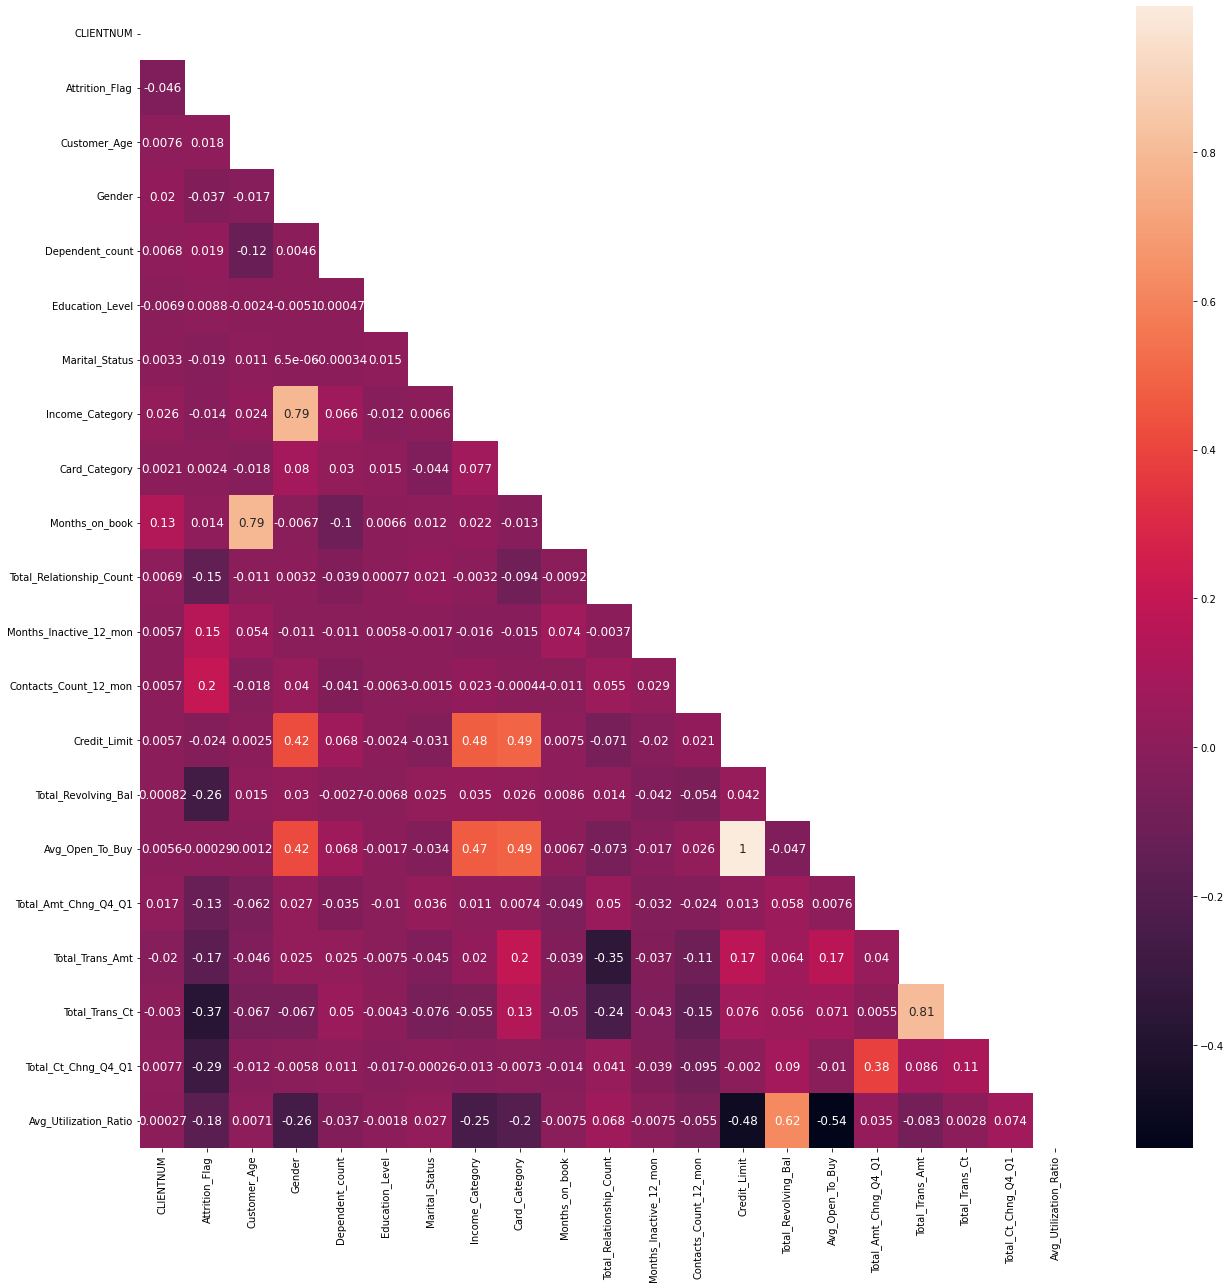

In [ ]:
plt.figure(figsize = (21,21))
sns.heatmap(data = analise_cred_corr, annot = True, cmap = "rocket", annot_kws = {'fontsize' : 12}, mask=mask);

____
Após conferir o mapa de calor da correlação, partimos para a primeira verificação e analise das correlações mais altas.

In [ ]:
analise_cred[analise_cred['Gender'] == 'F']['Income_Category'].value_counts()

Less than $40K    3284
Unknown           1060
$40K - $60K       1014
Name: Income_Category, dtype: int64

In [ ]:
analise_cred[analise_cred['Gender'] == 'M']['Income_Category'].value_counts()

$80K - $120K      1535
$60K - $80K       1402
$40K - $60K        776
$120K +            727
Less than $40K     277
Unknown             52
Name: Income_Category, dtype: int64

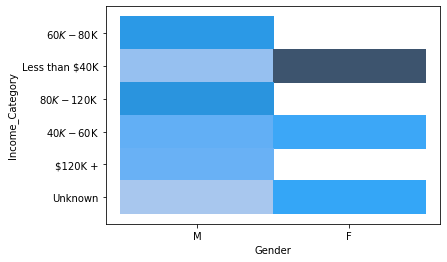

In [ ]:
# Aqui observo que o history plot não seria uma boa maneira para essa representação

sns.histplot(data = analise_cred, x = 'Gender', y = 'Income_Category')
plt.show()

Aqui conseguimos observar nosso primeiro outlier, no relacionamento de __Genero X Renda__. Ficando bem evidente que os clientes do sexo masculino recebem mais que as mulheres.

Como não temos uma relação forte entre eles com 'Attrition_Flag' não temos muito mais a analisar aqui.

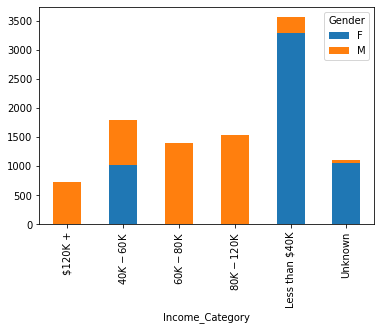

<Figure size 576x360 with 0 Axes>

In [ ]:
# A Maioria dos homens tem renda entre $80K - $120K, enquanto a maioria das mulheres recebem menos que $40K

contagem = analise_cred.groupby(['Income_Category', 'Gender']).size().unstack()

contagem.plot(kind='bar', stacked=True)
plt.figure(figsize = (8, 5))
plt.show()

____
Seguindo para proxima correlação forte, temos o __Relacionamento com o banco (Meses) X Idade__.

Vemos uma relação liner entre as duas colunas, mas quando agrupado com o Attrition_Flag uma boa correlação para aprofundamento do caso.

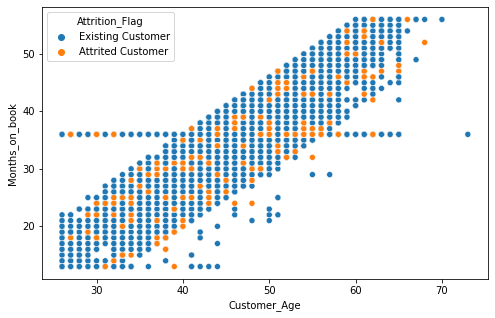

In [ ]:
plt.figure(figsize = (8, 5))
sns.scatterplot(data = analise_cred, x = 'Customer_Age', y = 'Months_on_book', hue = 'Attrition_Flag')

Agora utilizando o boxplot, é mais "facil" entender a possibilidade de dipersões imprecisas relacionado a idade dos clientes.

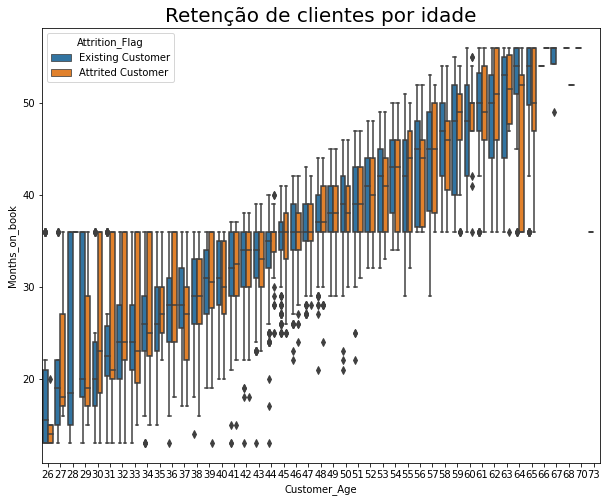

In [ ]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot 
ax = sns.boxplot(x = 'Customer_Age',
            y = 'Months_on_book',
            hue = 'Attrition_Flag',
            data = analise_cred)

plt.title('Retenção de clientes por idade', fontsize = 20)

#mostrando o grafico e alterando o label
#ax.set_xticklabels(['Feminino', 'Masculino'])
plt.show()

____
Algo que veio a me surpreender foi a não correlação do nivel escolar com a possibilidade do cliente ter atrito com o banco.

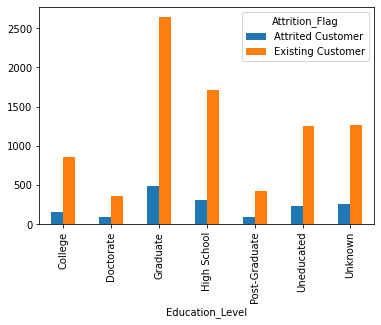

<Figure size 576x360 with 0 Axes>

In [ ]:
contagem = analise_cred.groupby(['Education_Level', 'Attrition_Flag']).size().unstack()

contagem.plot(kind='bar')
plt.figure(figsize = (8, 5))
plt.show()

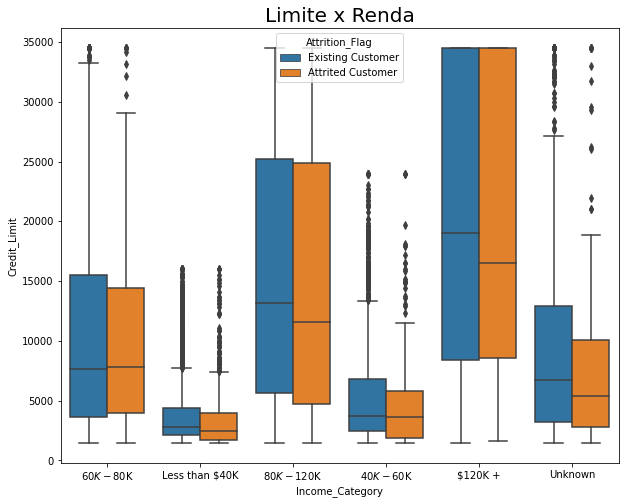

In [19]:
# Customizar a janela de grafico
plt.figure(figsize = (10, 8))

# Criando o boxplot
ax = sns.boxplot(x = 'Income_Category',
            y = 'Credit_Limit',
            hue = 'Attrition_Flag',
            data = analise_cred)

plt.title('Limite x Renda', fontsize = 20)

#mostrando o grafico e alterando o label
#ax.set_xticklabels(['Ok', 'not ok'])
plt.show()

No grafico acima observamos a presença de diversos outlier, mas ainda sim é possivel constatar que temos limite de crédito insuficientes para determinados grupos. 
A gente vê que houve pessoas que desistiram por não ter saldo rotativo, mas com limite de crédito baixo. Talvez isso poderia ser uma explicação para o atrito.
____

De forma a tornar mais sucinta a analise exploratoria, resolvi pesquisar por uma forma de trazer os graficos mais relevantes de uma só vez e tornar menos cansativa a analise.

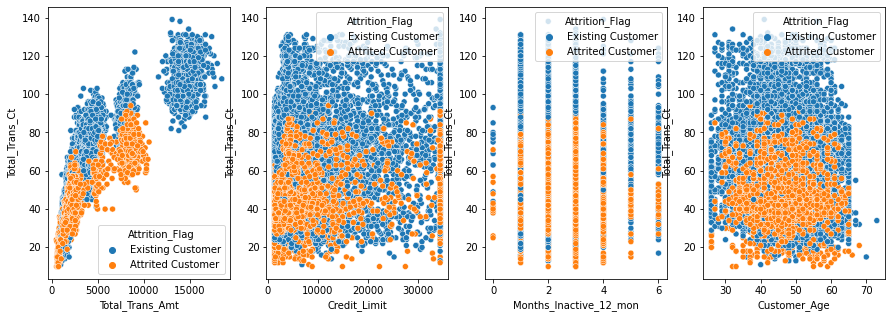

In [25]:
fig , ax = plt.subplots(ncols = 4, figsize= (15,5))

sns.scatterplot(data = analise_cred, x = 'Total_Trans_Amt' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[0])

sns.scatterplot(data = analise_cred, x = 'Credit_Limit' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[1])

sns.scatterplot(data = analise_cred, x = 'Months_Inactive_12_mon' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[2])

freqplot = sns.scatterplot(data = analise_cred, x = 'Customer_Age' , y = 'Total_Trans_Ct', hue = 'Attrition_Flag', ax = ax[3])

## Conclusão obtida

- Clientes com maior valor de transação e limite de crédito permanecem por mais tempo 

- Clientes com limite de crédito de 15.000 e inferior permaneceram por no máximo 3 meses e gastam no máximo 10.000 

- A distribuição etária é agrupada e sobreposta. 

- Pessoas de quase todas as idades rotatividade de crédito.

- Clientes insatisfeitos utilizaram cartões de crédito menos de 85 - 90 vezes em 5 meses 

- Clientes com limite de crédito mais alto (maior que 30.000) gastam em media mais de 12.000 por mês.
____

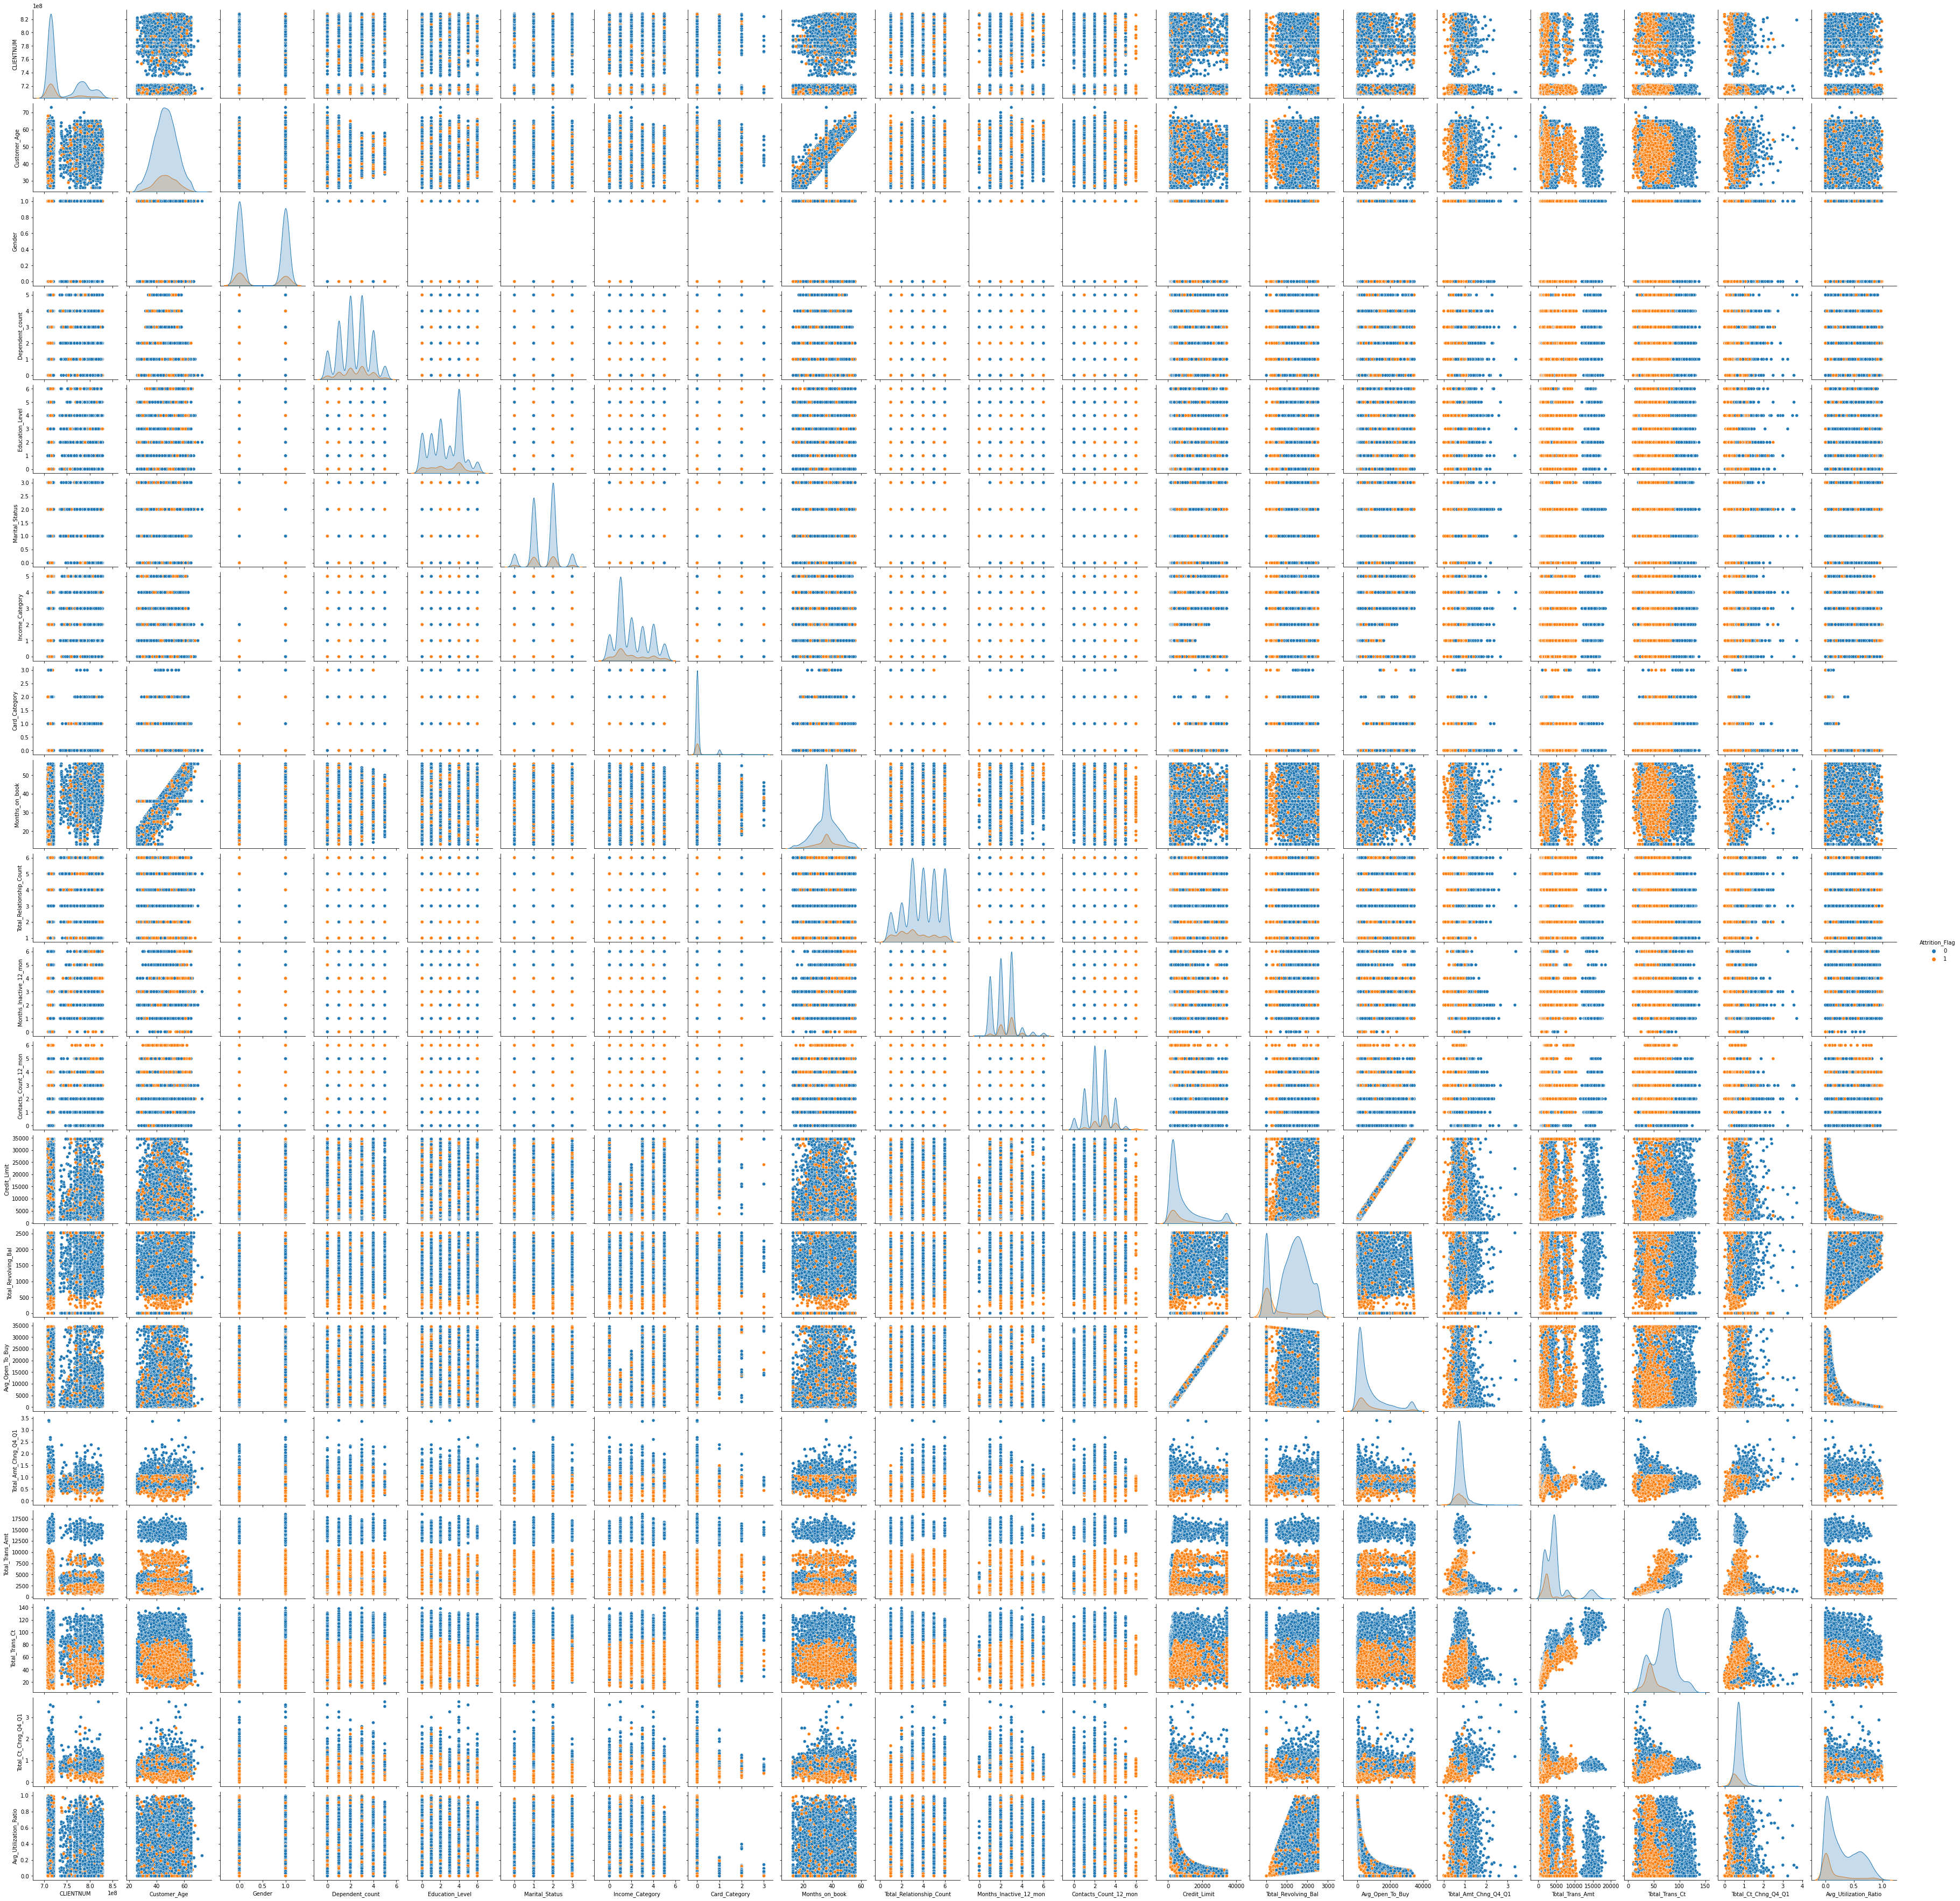

In [ ]:
sns.pairplot(analise_cred_exp, hue = 'Attrition_Flag')

# Mostra o gráfico
plt.show()

In [ ]:
# Desconsiderar, irei utilizar em futura analise
# analise_cred_selct = pd.concat([analise_cred['Attrition_Flag'],
#                           analise_cred['Gender'],
#                           analise_cred['Customer_Age'],
#                           analise_cred['Education_Level'],
#                           analise_cred['Income_Category'],
#                           analise_cred['Marital_Status']],axis=1)

In [ ]:
# Desconsiderar item, salvo para futura analise aprofundada
analise_cred[['Attrition_Flag', 'Gender']].value_counts(normalize=True).to_frame().style.format('{:.2%}')